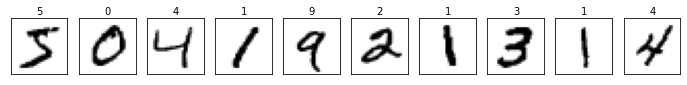

In [119]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)

Epoch 1/10
1200/1200 [==============================] - 1s 958us/step - loss: 0.2845 - accuracy: 0.9198 - val_loss: 0.1542 - val_accuracy: 0.9536
Epoch 2/10
1200/1200 [==============================] - 1s 853us/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.1134 - val_accuracy: 0.9651
Epoch 3/10
1200/1200 [==============================] - 1s 904us/step - loss: 0.0868 - accuracy: 0.9750 - val_loss: 0.0908 - val_accuracy: 0.9705
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 5/10
1200/1200 [==============================] - 1s 921us/step - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 6/10
1200/1200 [==============================] - 1s 959us/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0762 - val_accuracy: 0.9769
Epoch 7/10
1200/1200 [==============================] - 1s 933us/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0729 - v

[]

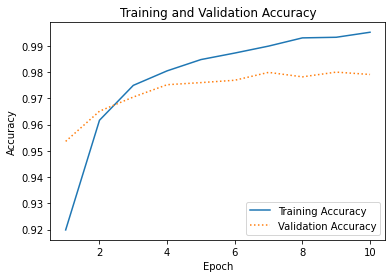

In [120]:
#### prep train and test data, then train ####

from tensorflow.keras.utils import to_categorical

x_train = train_images.reshape(60000, 28 * 28) / 255 # hier op letten! bij CNN is dit 28, 28 en bij normaal 28 * 28
x_test = test_images.reshape(10000, 28 * 28) / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=28 * 28)) # images zijn 28px*28px
model.add(Dense(10, activation='softmax')) # 10 mogelijke uitkomsten, softmax geeft de probability van elke
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # caterogical_crossentropy want we willen nu categories

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()



Looks like a 3!


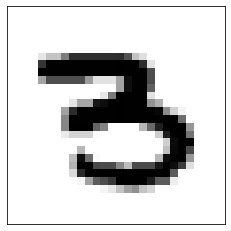

In [122]:
# pick a random test image and predict #

import random

test_image = test_images[random.randrange(0, 1000)]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

x = test_image.reshape(1, 28 * 28) / 255
predicted_class = np.argmax(model.predict(x), axis=-1)[0]
print('Looks like a ' + str(predicted_class) + '!')